In [1]:
import numpy as np
import librosa as rosa
import librosa.display
import pandas as pd
import scipy
from scipy import *

from matplotlib import pyplot as plt
plt.style.use("solarized-light")

In [2]:
c3, fs_c3 = rosa.load("./ling-la-c3-clip.wav")
f3, fs_f3 = rosa.load("./ling-la-f3-clip.wav")
c4, fs_c4 = rosa.load("./ling-la-c4-clip.wav")
"""
c3harm, c3perc = rosa.effects.hpss(c3)
f3harm, f3perc = rosa.effects.hpss(f3)
c4harm, c4perc = rosa.effects.hpss(c4)
"""

'\nc3harm, c3perc = rosa.effects.hpss(c3)\nf3harm, f3perc = rosa.effects.hpss(f3)\nc4harm, c4perc = rosa.effects.hpss(c4)\n'

In [3]:
def spshow(amp, fs, colormap="hot"):
    rosa.display.specshow(
        rosa.amplitude_to_db(
            np.abs(rosa.stft(amp, hop_length=1024)),
            ref=np.max
            ),
        y_axis = 'log',
        sr = fs,
        hop_length = 1024,
        x_axis = 'time',
        cmap=colormap
        )

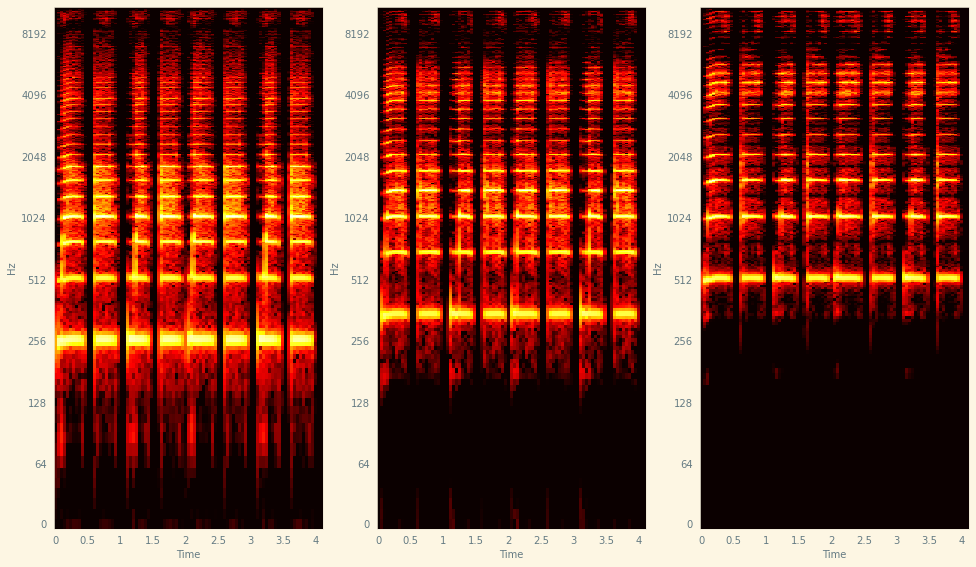

In [4]:
plt.rcParams["figure.figsize"] = [16.4, 9.6]
plt.subplot(131)
spshow(c3, fs_c3)
plt.subplot(132)
spshow(f3, fs_f3)
plt.subplot(133)
spshow(c4, fs_c4)
plt.show()

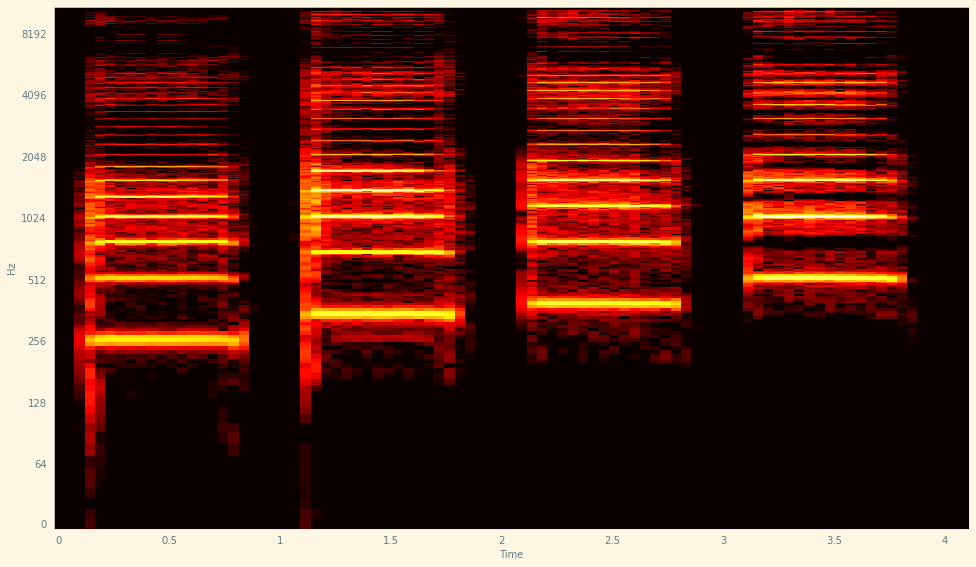

In [5]:
spshow(*rosa.load("./stairs-clip.wav"))
plt.show()

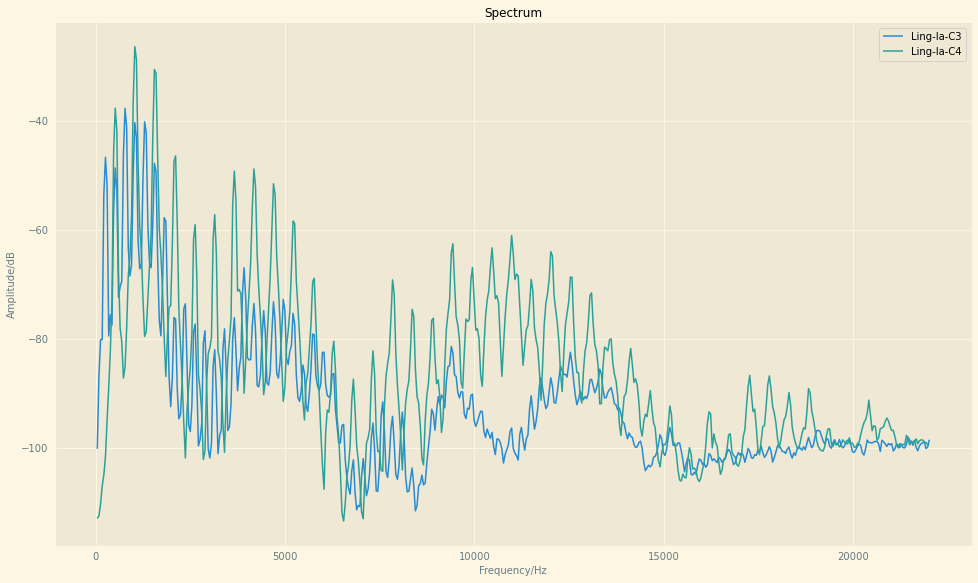

In [6]:
arr_c3spec = pd.read_csv("./spec-la-c3.txt", sep="\t").values[ : , : ]
arr_c4spec = pd.read_csv("./spec-la-c4.txt", sep="\t").values[ : , : ]
plt.plot(arr_c3spec[ : , 0 ], arr_c3spec[ : , 1 ], label="Ling-la-C3")
plt.plot(arr_c4spec[ : , 0 ], arr_c4spec[ : , 1 ], label="Ling-la-C4")
plt.title("Spectrum")
plt.xlabel("Frequency/Hz")
plt.ylabel("Amplitude/dB")
plt.legend()
plt.show()

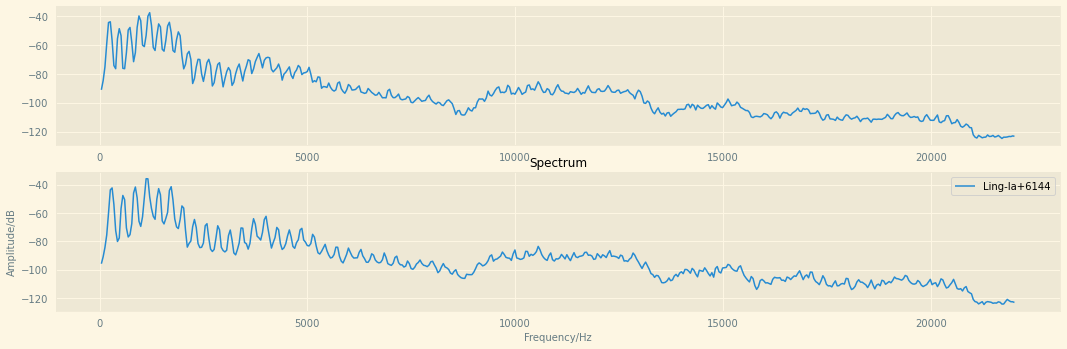

In [3]:
arr_c3spec = pd.read_csv("./single-la-c3.txt", sep="\t").values[ : , : ]
arr_c4spec = pd.read_csv("./single-la-c4.txt", sep="\t").values[ : , : ]
with plt.rc_context({"figure.figsize": [ 18, 5.6 ]}):
    plt.subplot(211)
    plt.plot(arr_c3spec[ : , 0 ], arr_c3spec[ : , 1 ], label="Ling-la-6144")
    plt.subplot(212)
    plt.plot(arr_c4spec[ : , 0 ], arr_c4spec[ : , 1 ], label="Ling-la+6144")
    plt.title("Spectrum")
    plt.xlabel("Frequency/Hz")
    plt.ylabel("Amplitude/dB")
    plt.legend()
    plt.show()

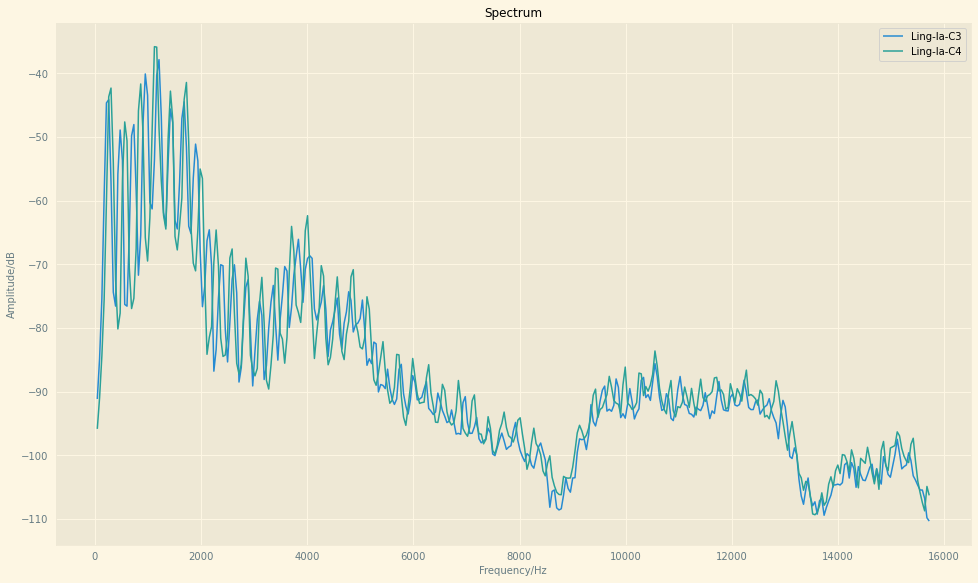

In [8]:
plt.plot(arr_c3spec[ : 365 , 0 ], arr_c3spec[ : 365 , 1 ], label="Ling-la-C3")
plt.plot(arr_c4spec[ : 365 , 0 ], arr_c4spec[ : 365 , 1 ], label="Ling-la-C4")
plt.title("Spectrum")
plt.xlabel("Frequency/Hz")
plt.ylabel("Amplitude/dB")
plt.legend()
plt.show()

In [68]:
M, T, f = 1000, 10, lambda x: np.cos(10 * x) + 3 * np.sin(3 * x) * np.cos(3 * x)
x = np.arange(4096) #np.linspace(0, T, M)
y = np.random.randn(4096, 1) #f(x)
y = (y.flatten() - y.mean()) / y.std()
y_fft = np.abs(scipy.fft.fft(y))
y_fft /= y_fft.max()
x_fft = scipy.fft.fftfreq(4096, 1) # scipy.fft.fftfreq(M, T / M)
x_fft = scipy.fft.fftshift(x_fft)
y_fft = scipy.fft.fftshift(y_fft)

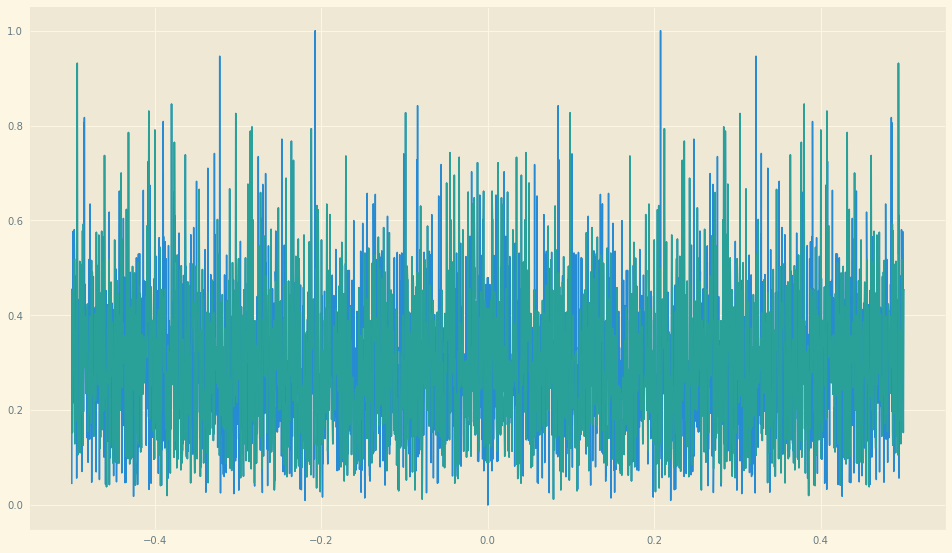

In [69]:
plt.plot(x_fft, y_fft)
plt.plot(x_fft[ 1 :: 2 ], y_fft[ 1 :: 2 ])
plt.show()

In [57]:
x_fft, fft.fftshift(x_fft), fft.fftshift(y_fft), np.allclose(
    fft.fftshift(y_fft)[ 1 : 2048 ],
    fft.fftshift(y_fft)[ : 2048 : -1 ]
    )

(array([-0.5       , -0.49975586, -0.49951172, ...,  0.49926758,
         0.49951172,  0.49975586]),
 array([ 0.        ,  0.00024414,  0.00048828, ..., -0.00073242,
        -0.00048828, -0.00024414]),
 array([2.15294805e-16, 1.20176512e-01, 4.20990781e-01, ...,
        4.88652879e-01, 4.20990781e-01, 1.20176512e-01]),
 True)